# Разведочный анализ данных. Исследование и визуализация данных.

## Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных, который содержит информацию о различных атрибутах набора яблок - https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data

Эта задача может быть акутальной для определения качества фруктов, или классификации их, опираясь на их особенности.

Датасет состоит из одного файла:
- apple_quality.csv 

Файл содержит следующие колонки:
- A_id - уникальный идентификатор для каждого фрукта
- Size - размер фрукта
- Weight - вес фрукта
- Sweetness - степень сладости фрукта
- Crunchiness - текстура, указывающая на хрусткость фрукта
- Juiciness - уровень сочности фрукта
- Ripeness - стадия спелости фрукта
- Acidity - уровень кислотности фрукта
- Quality - общее качество фрукта

## Основные характеристики датасета

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [30]:
data = pd.read_csv('apple_quality.csv')

In [31]:
# Первые 5 строк датасета
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good

In [32]:
# Размер датасета - 4000 строк, 9 колонок
data.shape

(4000, 9)

In [33]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4000


In [7]:
# Список колонок
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [34]:
# Список колонок с типами данных
data.dtypes

A_id             int64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [35]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

A_id - 0
Size - 0
Weight - 0
Sweetness - 0
Crunchiness - 0
Juiciness - 0
Ripeness - 0
Acidity - 0
Quality - 0


In [36]:
# Основные статистические характеристки набора данных
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75%       1.835976     1.766212     1.510493  
max       7.364403     7.237837     7.404736

In [37]:
# Определим уникальные значения для целевого признака
data['Quality'].unique()

array(['good', 'bad'], dtype=object)

Целевой признак содержит только значения 'good' и 'bad'

## 1.3. Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='Size', ylabel='Weight'>

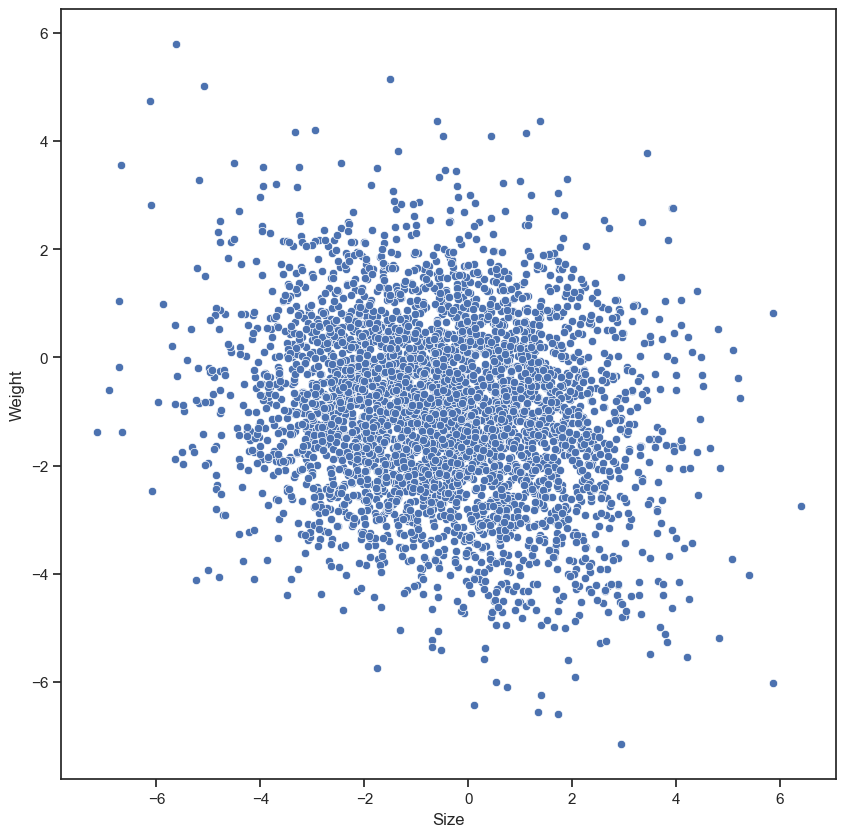

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Size', y='Weight', data=data)

Можно видеть что большая часть фруктов имеет слабую линейную зависимость между Size и Weight

Посмотрим насколько на эту зависимость влияет целевой признак.

<Axes: xlabel='Size', ylabel='Weight'>

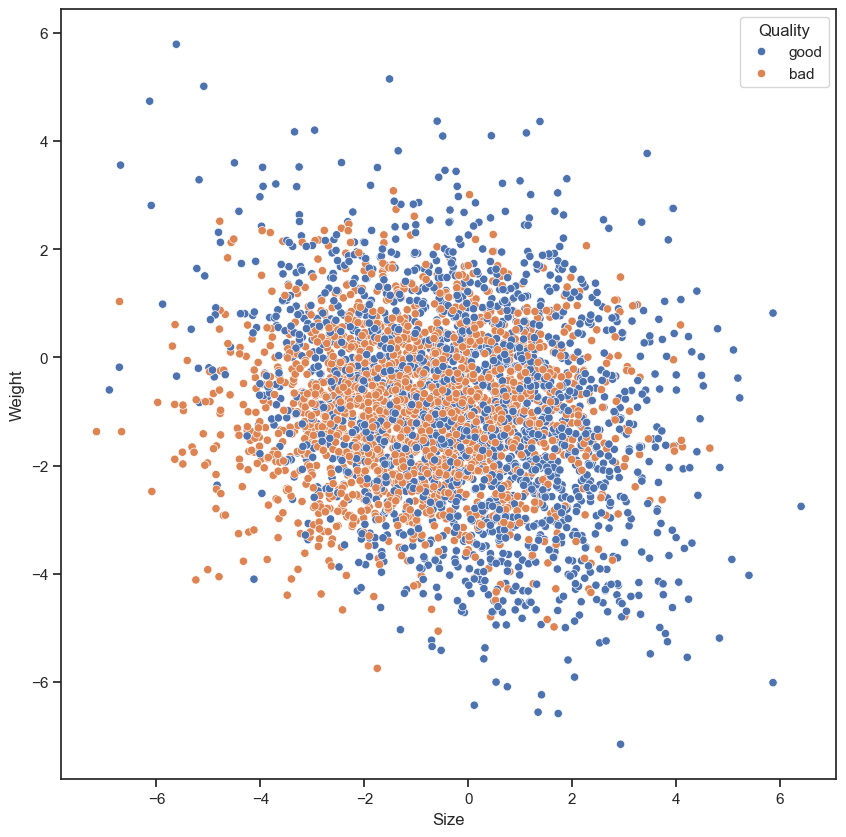

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Size', y='Weight', data=data, hue='Quality')

Видно, что "плохие" фрукты чаще соответствуют меньшему размеру и весу, тогда как "хорошие" - большему.

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

C:\Users\User\AppData\Local\Temp\ipykernel_4172\2873231673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

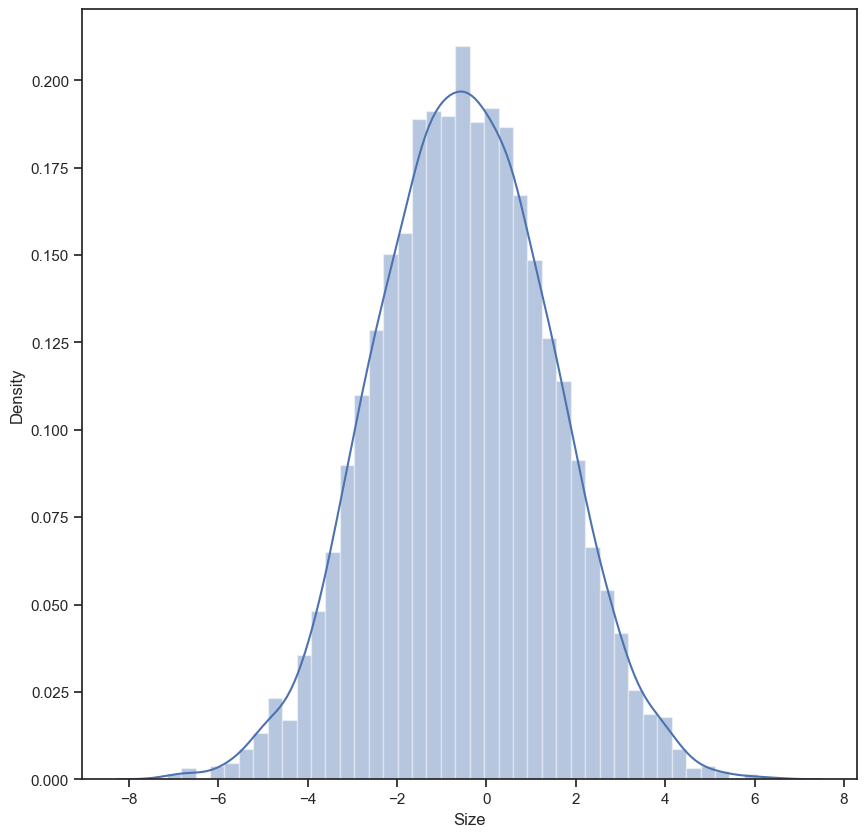

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Size'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

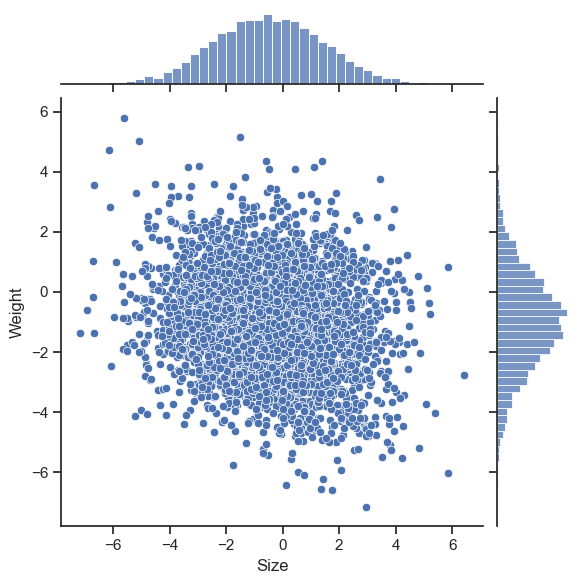

In [15]:
sns.jointplot(x='Size', y='Weight', data=data)

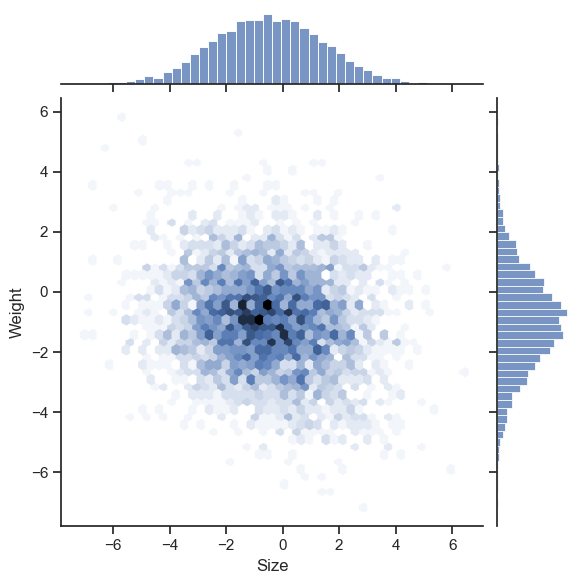

In [16]:
sns.jointplot(x='Size', y='Weight', data=data, kind="hex")

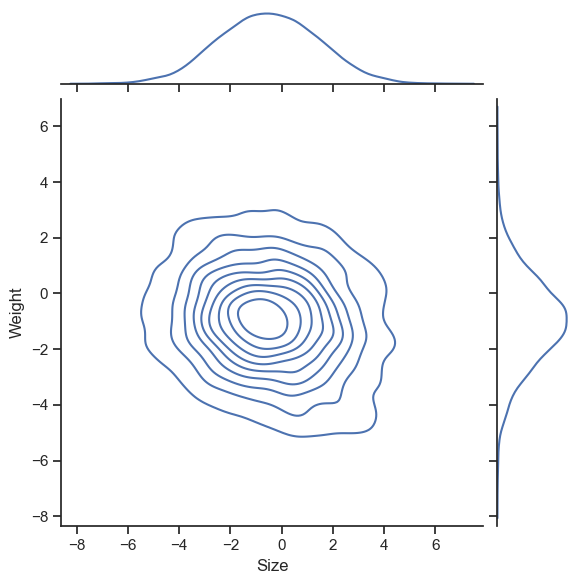

In [17]:
sns.jointplot(x='Size', y='Weight', data=data, kind="kde")

### 1.3.4. "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

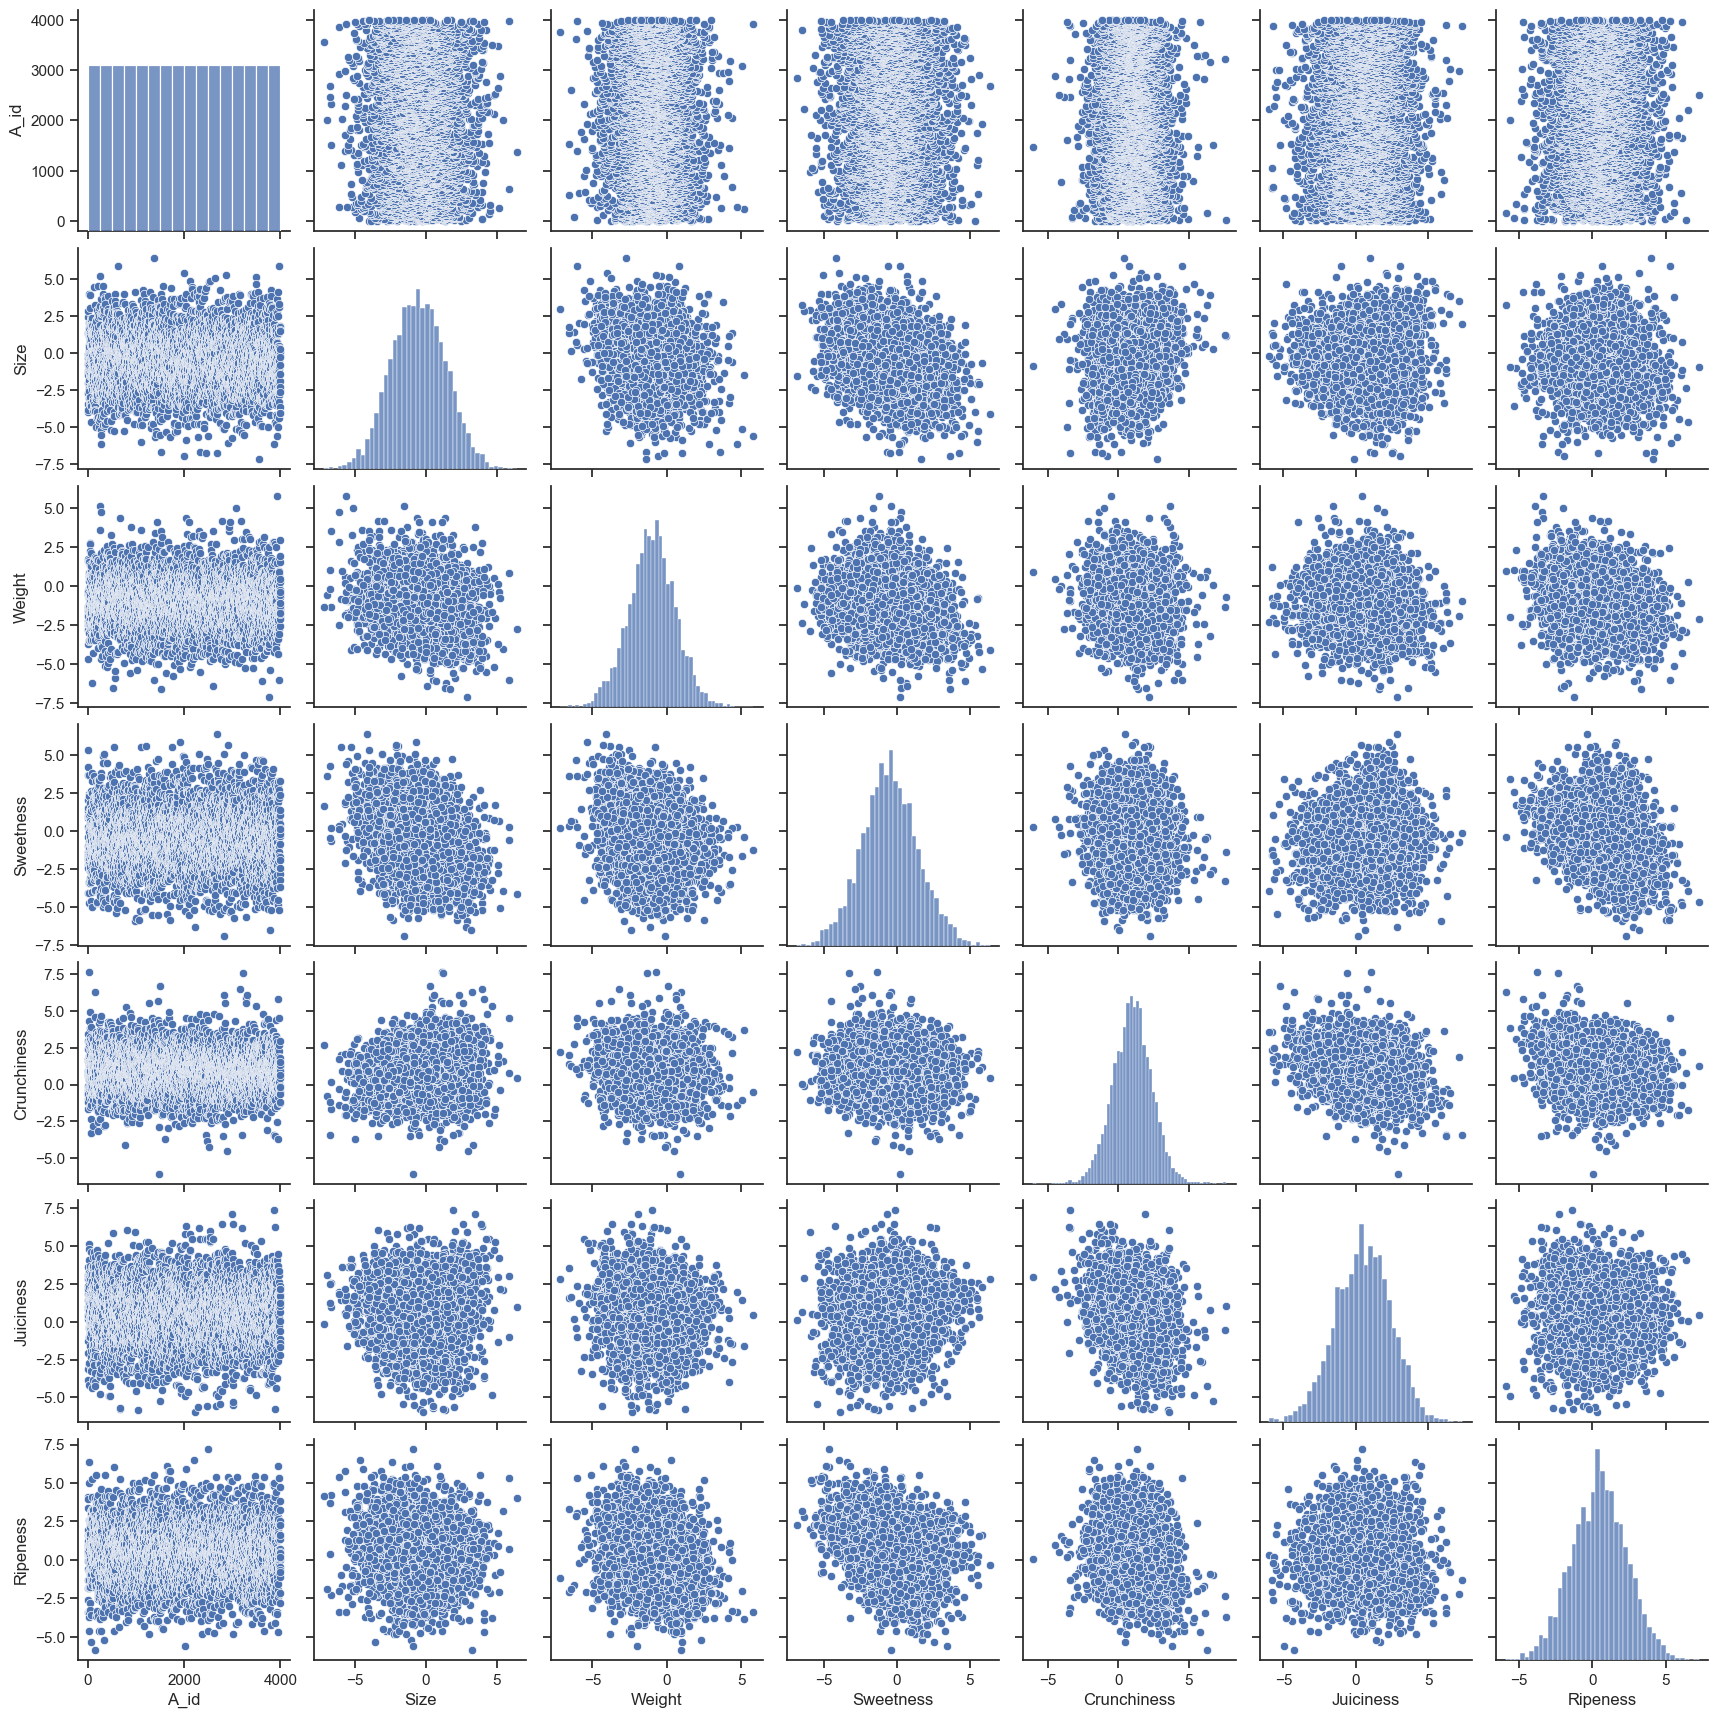

In [18]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

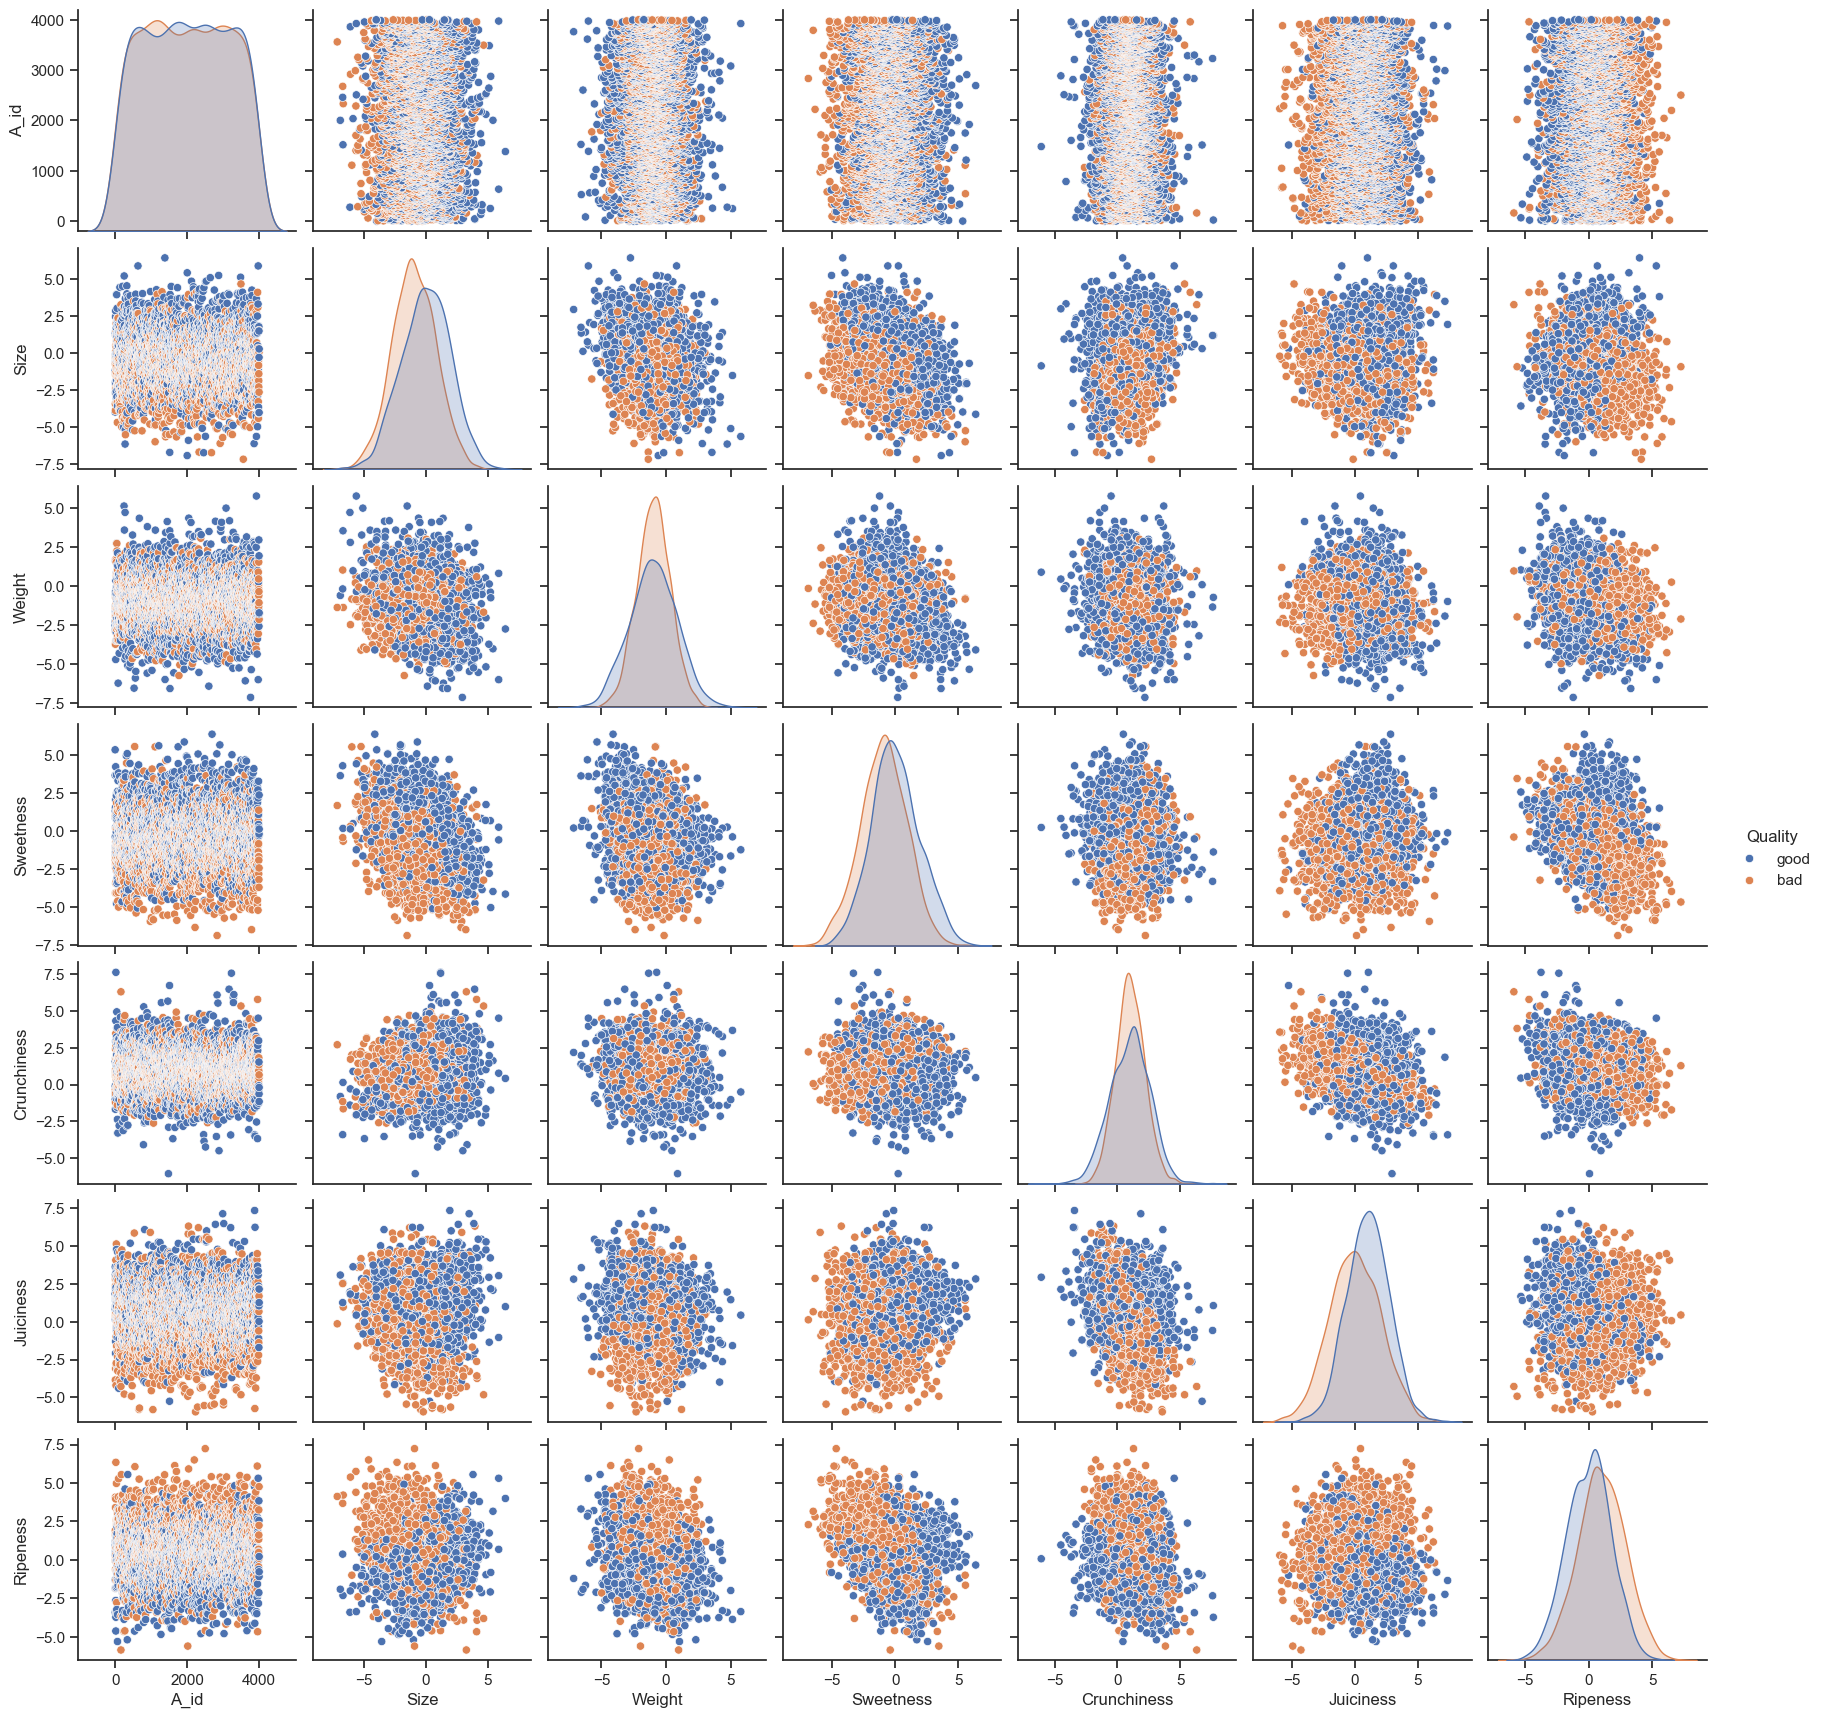

In [19]:
sns.pairplot(data, hue="Quality")

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

<Axes: xlabel='Weight'>

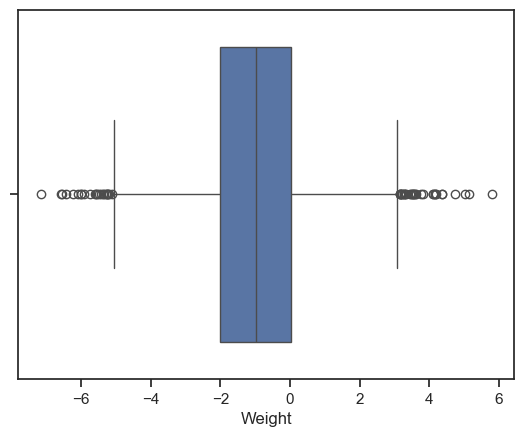

In [20]:
sns.boxplot(x=data['Weight'])

<Axes: ylabel='Weight'>

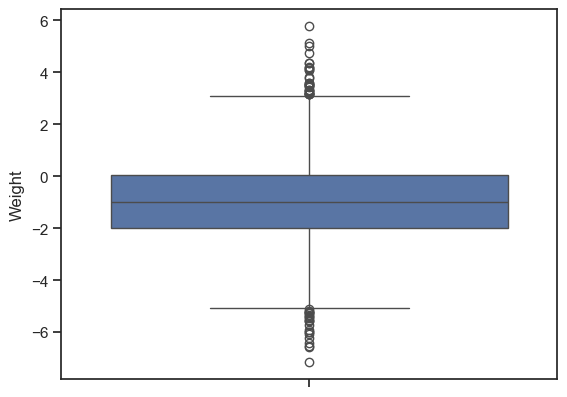

In [21]:
# По вертикали
sns.boxplot(y=data['Weight'])

<Axes: xlabel='Quality', ylabel='Weight'>

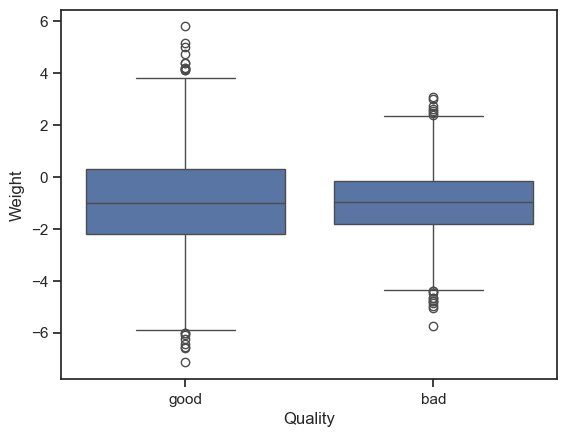

In [22]:
# Распределение параметра Weight сгруппированные по Quality.
sns.boxplot(x='Quality', y='Weight', data=data)

### 1.3.6. Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<Axes: xlabel='Weight'>

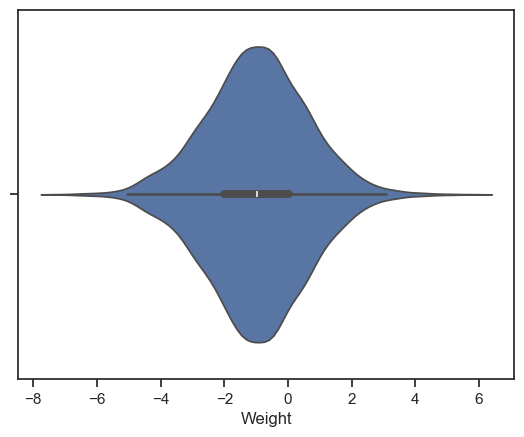

In [23]:
sns.violinplot(x=data['Weight'])

C:\Users\User\AppData\Local\Temp\ipykernel_4172\122636941.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'], ax=ax[1])


<Axes: xlabel='Weight', ylabel='Density'>

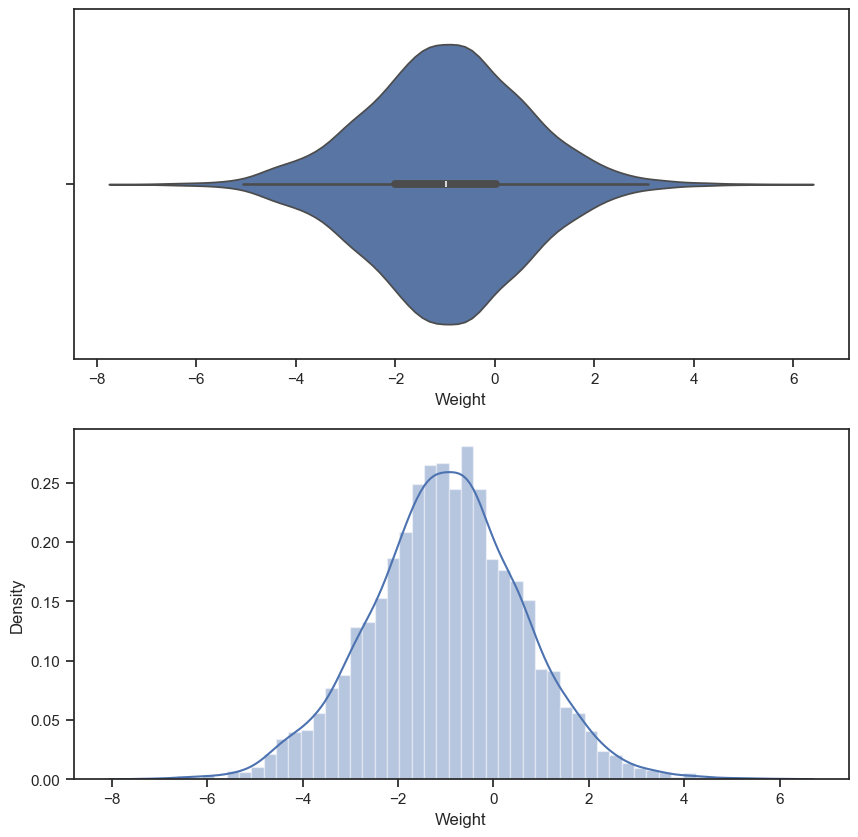

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Weight'])
sns.distplot(data['Weight'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<Axes: xlabel='Quality', ylabel='Weight'>

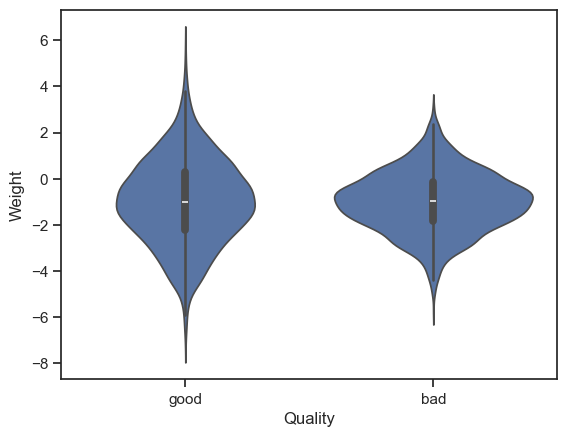

In [25]:
# Распределение параметра Weight сгруппированные по Quality.
sns.violinplot(x='Quality', y='Weight', data=data)

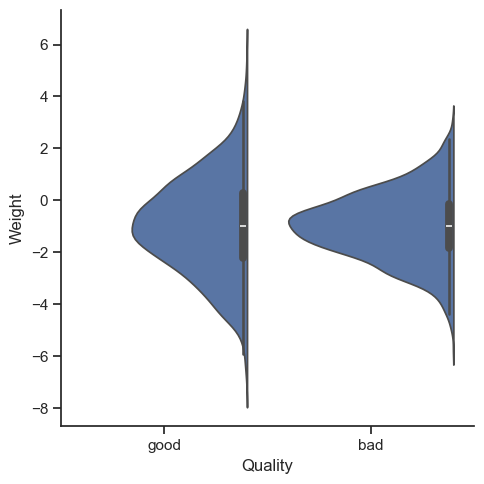

In [26]:
sns.catplot(y='Weight', x='Quality', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [40]:
data['Quality'] = data['Quality'].replace({'good': 1, 'bad': 0})

In [42]:
data.corr()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   
Acidity     -0.022237  0.196218  0.016414   0.085999     0.069943   0.248714   
Quality      0.004875  0.244007  0.001421   0.250998    -0.012376   0.260223   

             Ripeness   Acidity   Quality  
A_id         0.000742 -0.022237  0.004875  
Size        -0.134773  0.196218  0.244007  
Weight      -0.243824  0.016414  0.001421  
Sweetness   -0.273800  0.085999  0.250998  
Crunchiness -0.201982  0.069943 -0.012376  
Juiciness   -0.097144  0.248714  0.260223  
Ripeness     1.000000 -0.202669 -0.264315  
Acidity     -0.202669  1.000000 -0.007697  
Quality     -0.264315 -0.007697  1.000000

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее сильно коррелирует с сочностью (0.26), сладостью (0.25) и размером (0.24). Эти признаки обязательно следует оставить в модели.
- Целевой признак так же обратно коррелирует с стадией спелости (-0.26). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с весом (0.0014), хрусткостью (-0.012) и Hкислотностью (-0.008). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [43]:
data.corr(method='pearson')

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   
Acidity     -0.022237  0.196218  0.016414   0.085999     0.069943   0.248714   
Quality      0.004875  0.244007  0.001421   0.250998    -0.012376   0.260223   

             Ripeness   Acidity   Quality  
A_id         0.000742 -0.022237  0.004875  
Size        -0.134773  0.196218  0.244007  
Weight      -0.243824  0.016414  0.001421  
Sweetness   -0.273800  0.085999  0.250998  
Crunchiness -0.201982  0.069943 -0.012376  
Juiciness   -0.097144  0.248714  0.260223  
Ripeness     1.000000 -0.202669 -0.264315  
Acidity     -0.202669  1.000000 -0.007697  
Quality     -0.264315 -0.007697  1.000000

In [44]:
data.corr(method='kendall')

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.022124 -0.004756   0.001090    -0.010822   0.002903   
Size        -0.022124  1.000000 -0.097221  -0.211004     0.118658  -0.023001   
Weight      -0.004756 -0.097221  1.000000  -0.080836    -0.058782  -0.060676   
Sweetness    0.001090 -0.211004 -0.080836   1.000000    -0.011565   0.065046   
Crunchiness -0.010822  0.118658 -0.058782  -0.011565     1.000000  -0.161359   
Juiciness    0.002903 -0.023001 -0.060676   0.065046    -0.161359   1.000000   
Ripeness    -0.003643 -0.101724 -0.166940  -0.171992    -0.125027  -0.085860   
Acidity     -0.011820  0.146168  0.021569   0.050970     0.050257   0.155507   
Quality      0.003981  0.200302  0.001405   0.193716     0.000239   0.210762   

             Ripeness   Acidity   Quality  
A_id        -0.003643 -0.011820  0.003981  
Size        -0.101724  0.146168  0.200302  
Weight      -0.166940  0.021569  0.001405  
Sweetness   -0.171992  0.050970  0.193716  
Crunchiness -0.125027  0.050257  0.000239  
Juiciness   -0.085860  0.155507  0.210762  
Ripeness     1.000000 -0.128693 -0.212419  
Acidity     -0.128693  1.000000  0.003322  
Quality     -0.212419  0.003322  1.000000

In [45]:
data.corr(method='spearman')

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.032884 -0.007299   0.001549    -0.016020   0.004177   
Size        -0.032884  1.000000 -0.144268  -0.310476     0.171818  -0.031881   
Weight      -0.007299 -0.144268  1.000000  -0.119883    -0.087117  -0.090611   
Sweetness    0.001549 -0.310476 -0.119883   1.000000    -0.017346   0.097540   
Crunchiness -0.016020  0.171818 -0.087117  -0.017346     1.000000  -0.236538   
Juiciness    0.004177 -0.031881 -0.090611   0.097540    -0.236538   1.000000   
Ripeness    -0.005404 -0.154780 -0.244340  -0.254604    -0.183677  -0.124169   
Acidity     -0.017871  0.209998  0.030479   0.072026     0.073556   0.230778   
Quality      0.004875  0.245288  0.001721   0.237223     0.000293   0.258097   

             Ripeness   Acidity   Quality  
A_id        -0.005404 -0.017871  0.004875  
Size        -0.154780  0.209998  0.245288  
Weight      -0.244340  0.030479  0.001721  
Sweetness   -0.254604  0.072026  0.237223  
Crunchiness -0.183677  0.073556  0.000293  
Juiciness   -0.124169  0.230778  0.258097  
Ripeness     1.000000 -0.194695 -0.260126  
Acidity     -0.194695  1.000000  0.004068  
Quality     -0.260126  0.004068  1.000000

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

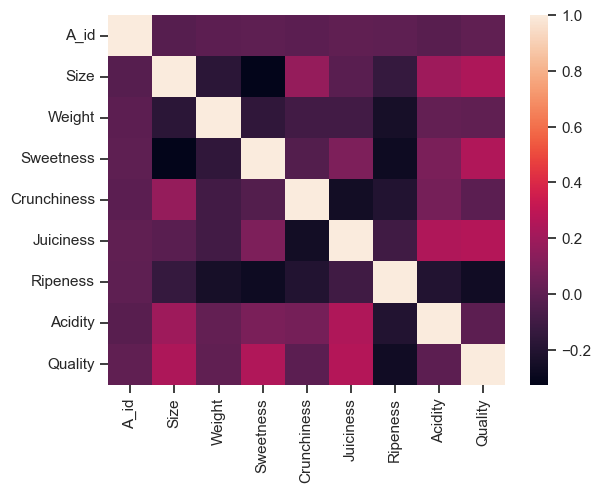

In [46]:
sns.heatmap(data.corr())

<Axes: >

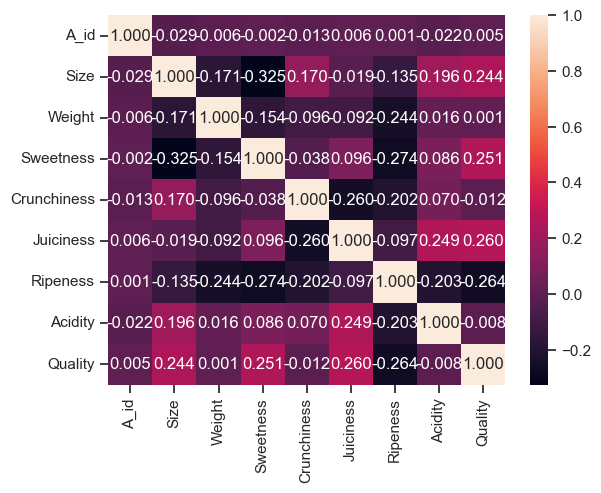

In [47]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<Axes: >

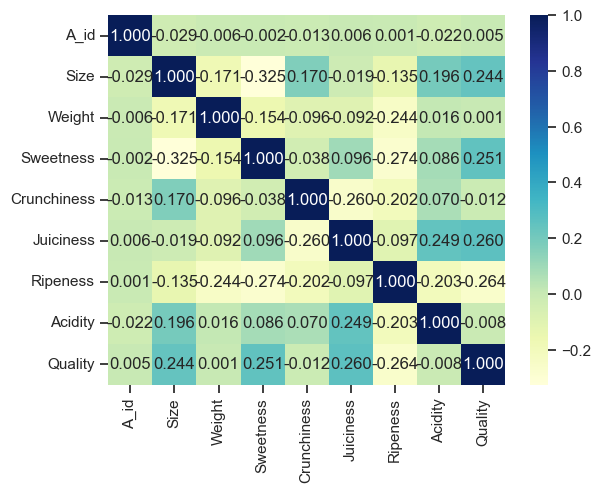

In [48]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<Axes: >

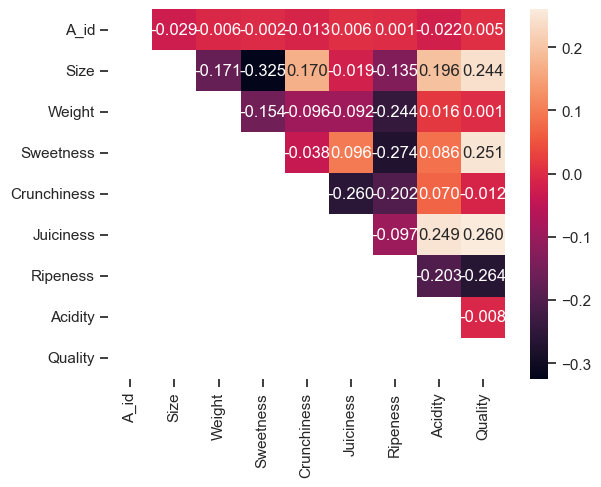

In [50]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

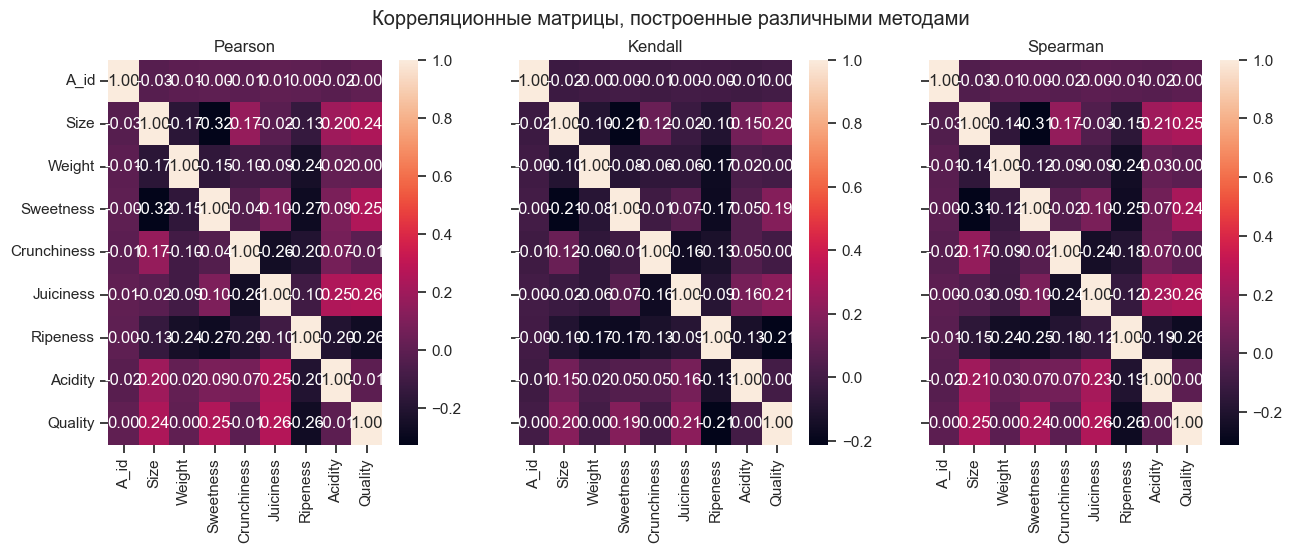

In [51]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<Axes: >

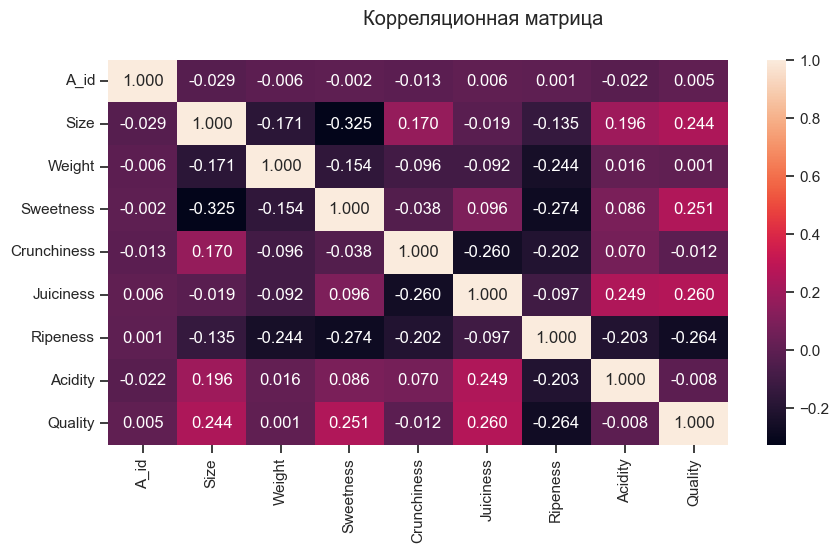

In [52]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')